In [5]:
#!/usr/bin/env python
import sys
import zipfile
import urllib.request # requires Python 3
import io
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

# Some helper functions for loading braidz files

In [11]:
def open_filename_or_url(filename_or_url):
    parsed = urllib.parse.urlparse(filename_or_url)
    is_windows_drive = len(parsed.scheme) == 1
    if is_windows_drive or parsed.scheme=='':
        # no scheme, so this is a filename.
        fileobj_with_seek = open(filename_or_url,mode='rb')
    else:
        # Idea for one day: implement HTTP file object reader that implements
        # seek using HTTP range requests.
        fileobj = urllib.request.urlopen(filename_or_url)
        fileobj_with_seek = io.BytesIO(fileobj.read())
    return fileobj_with_seek

def load_filename_as_dataframe_2d(filename_or_url):
    fileobj = open_filename_or_url(filename_or_url)

    with zipfile.ZipFile(file=fileobj, mode='r') as archive:
        cam_info_df = pd.read_csv(
            archive.open('cam_info.csv.gz'),
            comment="#",
            compression='gzip')

        camn2camid = {}
        for i, row in cam_info_df.iterrows():
            camn2camid[row['camn']] = row['cam_id']

        cam_ids = list(cam_info_df['cam_id'].values)
        cam_ids.sort()
        data2d_distorted_df = pd.read_csv(
            archive.open('data2d_distorted.csv.gz'),
            comment="#",
            compression='gzip')
        
    return data2d_distorted_df

def load_filename_as_dataframe_3d(filename_or_url):
    fileobj = open_filename_or_url(filename_or_url)

    with zipfile.ZipFile(file=fileobj, mode='r') as archive:
        df = pd.read_csv(
            archive.open('kalman_estimates.csv.gz'),
            comment="#",
            compression='gzip')
    return df

# Load the 2D data as a pandas dataframe

In [9]:
braid_file = '20201226_181607.braidz' 
df_2d = load_filename_as_dataframe_2d(braid_file)

In [10]:
df_2d

,camn,frame,timestamp,cam_received_timestamp,x,y,area,slope,eccentricity,frame_pt_idx,cur_val,mean_val,sumsqf_val
0,1,1533,1.609035e+09,1.609035e+09,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
1,2,1533,1.609035e+09,1.609035e+09,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2,3,1533,1.609035e+09,1.609035e+09,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
3,4,1533,1.609035e+09,1.609035e+09,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
4,5,1533,1.609035e+09,1.609035e+09,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
5,6,1533,1.609035e+09,1.609035e+09,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
6,7,1533,1.609035e+09,1.609035e+09,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
7,8,1533,1.609035e+09,1.609035e+09,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
8,9,1533,1.609035e+09,1.609035e+09,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
9,10,1533,1.609035e+09,1.609035e+09,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN


### Some camera tracking statistics

Some cameras have many fewer detections. Could be that either they are looking at a less frequently visited space, or the tracking settings are not sufficient. 

In [62]:
def get_number_of_detections_per_camera(df_2d):
    camns = df_2d.camn.unique()
    detections_per_camera = {}
    for camn in camns:
        dfcamn = df_2d[df_2d['camn']==camn]
        dfcamn["x_real"] = ~np.isnan(dfcamn.x) # turn NaN and pixel vals into binary
        dfcamn_sum = dfcamn.groupby(by=["frame"]).sum() # add all together
        detections_per_camera[camn] = int(dfcamn_sum.x_real.sum())
    return detections_per_camera

In [63]:
get_number_of_detections_per_camera(df_2d)

/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{0: 3849560,
 1: 569978,
 2: 1646036,
 3: 806024,
 4: 1665027,
 5: 950522,
 6: 2451731,
 7: 1863637,
 8: 1014206,
 9: 3052906,
 10: 561789,
 11: 379771}

# Load the 3D data as a dataframe

In [12]:
braid_file = '20201226_181607.braidz' 
df_3d = load_filename_as_dataframe_3d(braid_file)

In [13]:
df_3d

,obj_id,frame,timestamp,x,y,z,xvel,yvel,zvel,P00,P01,P02,P11,P12,P22,P33,P44,P55
0,0,38898,1.609036e+09,0.430724,-1.227454,-0.478429,0.000000,0.000000,0.000000,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000,1.000000,1.000000
1,1,38904,1.609036e+09,0.497998,-1.422004,-0.654617,0.000000,0.000000,0.000000,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000,1.000000,1.000000
2,2,38909,1.609036e+09,0.311706,-0.811305,-0.186477,0.000000,0.000000,0.000000,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000,1.000000,1.000000
3,3,38911,1.609036e+09,0.498389,-1.466152,-0.717219,0.000000,0.000000,0.000000,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000,1.000000,1.000000
4,4,38914,1.609036e+09,0.567859,-1.679630,-0.865587,0.000000,0.000000,0.000000,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000,1.000000,1.000000
5,5,38916,1.609036e+09,0.553863,-1.625339,-0.839999,0.000000,0.000000,0.000000,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000,1.000000,1.000000
6,6,38918,1.609036e+09,0.450529,-1.292547,-0.585378,0.000000,0.000000,0.000000,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000,1.000000,1.000000
7,7,38919,1.609036e+09,0.232040,-0.441613,0.133973,0.000000,0.000000,0.000000,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000,1.000000,1.000000
8,7,38920,1.609036e+09,-0.039368,-0.061536,0.550294,-0.268854,0.376500,0.412404,5.524381e-07,-1.367188e-06,-1.685555e-06,7.234564e-06,8.045080e-06,9.548759e-06,0.991090,0.991096,0.991099
9,8,38924,1.609036e+09,0.081255,0.627418,1.081826,0.000000,0.000000,0.000000,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000,1.000000,1.000000


# Plot 2D data per camera for an object id

In [144]:
#obj_id = 593
obj_id = 10132

In [145]:
trajec = df_3d[df_3d.obj_id==obj_id]

#### Plot the 3D trajectory

Text(0,0.5,'z')

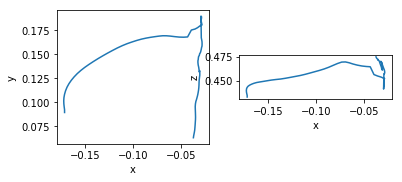

In [146]:
fig = plt.figure()

ax = fig.add_subplot(121)
ax.plot(trajec.x, trajec.y)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax = fig.add_subplot(122)
ax.plot(trajec.x, trajec.z)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('z')

#### Get the 2D data

In [147]:
frames = trajec.frame.values
print("N frames: ", len(frames))

N frames:  103


#### Add some frames before and after for debugging

In [148]:
before = np.arange(frames[0]-30,frames[0])
after = np.arange(frames[-1]+1,frames[-1]+30)

# keep  track of which frames were added
color = np.array([0.5]*len(before) + [1]*len(frames) + [0.5]*len(after))

frames = np.hstack((before, frames, after))

In [149]:
# get 2d data associated with trajec
df_2d_traj = df_2d[df_2d['frame'].isin(frames)]

camns = df_2d_traj.camn.unique()
camns = np.sort(camns)

#### Plot the 2D data for all cameras

Notes:
1. multiple lines for one camera means that it saw multiple objects.
2. yellow = frames corresponding to 3D trajectory
3. purple = frames before or after the 3D trajectory


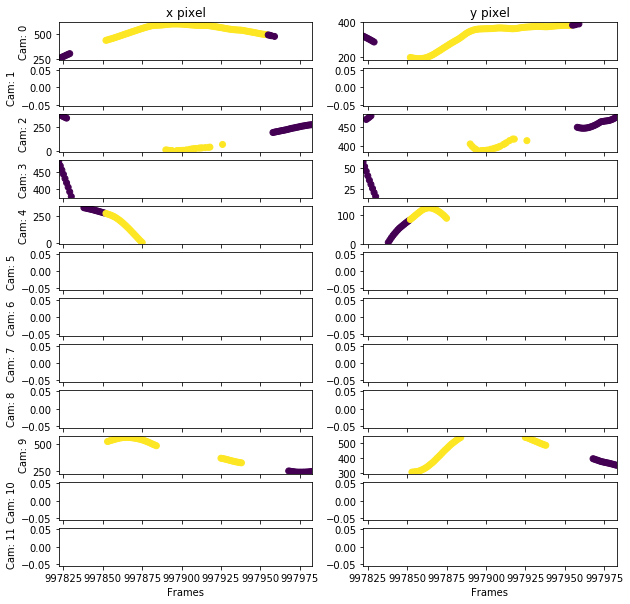

In [151]:
fig = plt.figure(figsize=(10,10))

for camn in camns:
    ax = fig.add_subplot(len(camns), 2, 2*camn+1)
    ax.scatter( df_2d_traj[df_2d_traj['camn']==camn].frame, 
                df_2d_traj[df_2d_traj['camn']==camn].x,
                c=color)
    ax.set_ylabel('Cam: ' + str(camn))
    
    # plot labels
    ax.set_xlim(frames[0], frames[-1])
    if camn==0:
        ax.set_title('x pixel')
    if camn != camns[-1]:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Frames')
    
    ax = fig.add_subplot(len(camns), 2, 2*camn+2)
    ax.scatter(df_2d_traj[df_2d_traj['camn']==camn].frame, 
               df_2d_traj[df_2d_traj['camn']==camn].y,
               c=color)
    
    # plot labels
    ax.set_xlim(frames[0], frames[-1])
    if camn==0:
        ax.set_title('y pixel')
    if camn != camns[-1]:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Frames')

# What do the cameras actually see in 3D coordinates?

The calculations here are a little imperfect as they assume that all 2D information during a 3D trajectory was part of that one trajectory, and they ignore multiple objects per camera.

But the plots still give an overall sense of where in 3D the cameras actually see flies.

In [245]:
def get_long_obj_ids_fast_pandas(df_3d, length=30):
    # This is much faster than other brute force methods. It leverages pandas stuff.
    number_frames_per_obj_id = df_3d[["frame", "obj_id"]].groupby(by=["obj_id"]).agg(["count"])
    long_obj_ids = number_frames_per_obj_id[  number_frames_per_obj_id[('frame', 'count')]  >  length  ].index.values
    return long_obj_ids

In [247]:
# find the long trajec ids
obj_ids = get_long_obj_ids_fast_pandas(df_3d, length=30)
print('N obj ids: ', len(obj_ids))

N obj ids:  6969


In [277]:
# get the rows corresponding to long trajectories
# and only take the columns we need for efficiency
df_3d_filtered = df_3d[df_3d.obj_id.isin(obj_ids)]
df_3d_filtered = df_3d_filtered[["obj_id", "frame", "x", "y", "z"]]

In [251]:
# get the frames corresponding to the long 3d trajectories
frames = df_3d_filtered.frame.values

In [348]:
# get the 2d data correspondign to those frames
# and only take the columns we need for efficiency
df_2d_filtered = df_2d[df_2d.frame.isin(frames)]
df_2d_filtered = df_2d_filtered[["camn", "frame", "x", "y"]]

In [349]:
# get binary values for which rows of 2d data found an object
df_2d_filtered["x_real"] = (~np.isnan(df_2d_filtered.x)).astype(int)

In [350]:
# For each camera, find the 2D frames where an object was detected
# Then find the corresponding frames in the 3D data and set the appropriate camera number to 1
# This is not completely accurate, but so long as only one object per frame it will be true
# It is much faster than correct methods
for camn in df_2d_filtered.camn.unique():
    #camn = 4
    q = df_2d_filtered.query("camn == " + str(camn) + " & x_real == 1")
    df_3d_filtered.loc[df_3d_filtered.frame.isin(q.frame), "cam_"+str(camn)] = 1

#### Histogram of all the long trajectories

All data in the dimension not part of the 2D histogram is pooled. e.g. for a X-Y histogram all Z data is pooled.

/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


Text(0,0.5,'y position')

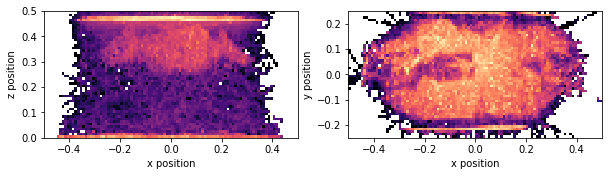

In [335]:
res = 0.01
binx = np.arange(-0.5, 0.5+res, res)
biny = np.arange(-0.25, 0.25+res, res)
binz = np.arange(0, 0.5+res, res)
Hxz, xedges, zedges = np.histogram2d(df_3d_filtered['x'], df_3d_filtered['z'], bins=[binx, binz])
Hxy, xedges, yedges = np.histogram2d(df_3d_filtered['x'], df_3d_filtered['y'], bins=[binx, biny])


fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)

# xz
ax1.imshow(np.log(Hxz.T), origin="lower", 
           extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]], cmap="magma")
ax1.set_xlim(-.5, .5)
ax1.set_ylim(0, 0.5)
ax1.set_aspect('equal')

ax1.set_xlabel('x position')
ax1.set_ylabel('z position')



# xy
ax1 = fig.add_subplot(122)

ax1.imshow(np.log(Hxy.T), origin="lower", 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="magma")
ax1.set_xlim(-.5, .5)
ax1.set_ylim(-0.25, 0.25)
ax1.set_aspect('equal')

ax1.set_xlabel('x position')
ax1.set_ylabel('y position')

#### Histogram of trajectories seen by a particular camera normalized by all trajectories

In [330]:
camn = 5

In [331]:
df_3d_filtered_cam = df_3d_filtered.query("cam_" + str(camn) + " == 1")

/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


Text(0,0.5,'y position')

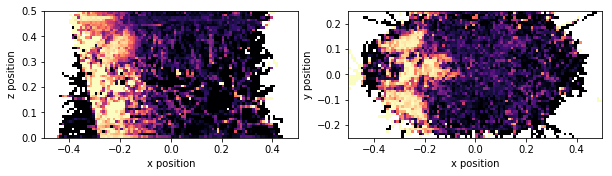

In [337]:
res = 0.01
binx = np.arange(-0.5, 0.5+res, res)
biny = np.arange(-0.25, 0.25+res, res)
binz = np.arange(0, 0.5+res, res)
Hxz_cam, xedges, zedges = np.histogram2d(df_3d_filtered_cam['x'], df_3d_filtered_cam['z'], bins=[binx, binz])
Hxy_cam, xedges, yedges = np.histogram2d(df_3d_filtered_cam['x'], df_3d_filtered_cam['y'], bins=[binx, biny])


fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)

# xz
ax1.imshow( (Hxz_cam / Hxz).T, origin="lower", 
           extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]], cmap="magma")
ax1.set_xlim(-.5, .5)
ax1.set_ylim(0, 0.5)
ax1.set_aspect('equal')

ax1.set_xlabel('x position')
ax1.set_ylabel('z position')



# xy
ax1 = fig.add_subplot(122)

ax1.imshow( (Hxy_cam / Hxy).T, origin="lower", 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="magma")
ax1.set_xlim(-.5, .5)
ax1.set_ylim(-0.25, 0.25)
ax1.set_aspect('equal')

ax1.set_xlabel('x position')
ax1.set_ylabel('y position')

#### The above all together in one function

In [340]:
def plot_heatmap_of_camera_view(camn, df_3d_filtered, ax1=None, ax2=None):
    res = 0.01
    binx = np.arange(-0.5, 0.5+res, res)
    biny = np.arange(-0.25, 0.25+res, res)
    binz = np.arange(0, 0.5+res, res)

    # First get histogram of all trajectories
    Hxz, xedges, zedges = np.histogram2d(df_3d_filtered['x'], df_3d_filtered['z'], bins=[binx, binz])
    Hxy, xedges, yedges = np.histogram2d(df_3d_filtered['x'], df_3d_filtered['y'], bins=[binx, biny])

    # Now filter for camera
    df_3d_filtered_cam = df_3d_filtered.query("cam_" + str(camn) + " == 1")
    Hxz_cam, xedges, zedges = np.histogram2d(df_3d_filtered_cam['x'], df_3d_filtered_cam['z'], bins=[binx, binz])
    Hxy_cam, xedges, yedges = np.histogram2d(df_3d_filtered_cam['x'], df_3d_filtered_cam['y'], bins=[binx, biny])

    if ax1 is None:
        fig = plt.figure(figsize=(10,5))
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)

    # xz
    ax1.imshow( (Hxz_cam / Hxz).T, origin="lower", 
               extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]], cmap="magma")
    ax1.set_xlim(-.5, .5)
    ax1.set_ylim(0, 0.5)
    ax1.set_aspect('equal')

    ax1.set_xlabel('x position')
    ax1.set_ylabel('z position\ncamera: ' + str(camn))

    # xy
    ax2.imshow( (Hxy_cam / Hxy).T, origin="lower", 
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="magma")
    ax2.set_xlim(-.5, .5)
    ax2.set_ylim(-0.25, 0.25)
    ax2.set_aspect('equal')

    ax2.set_xlabel('x position')
    ax2.set_ylabel('y position')

Plotting camera:  0


/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


Plotting camera:  1
Plotting camera:  2
Plotting camera:  3
Plotting camera:  4
Plotting camera:  5
Plotting camera:  6
Plotting camera:  7
Plotting camera:  8
Plotting camera:  9
Plotting camera:  10
Plotting camera:  11


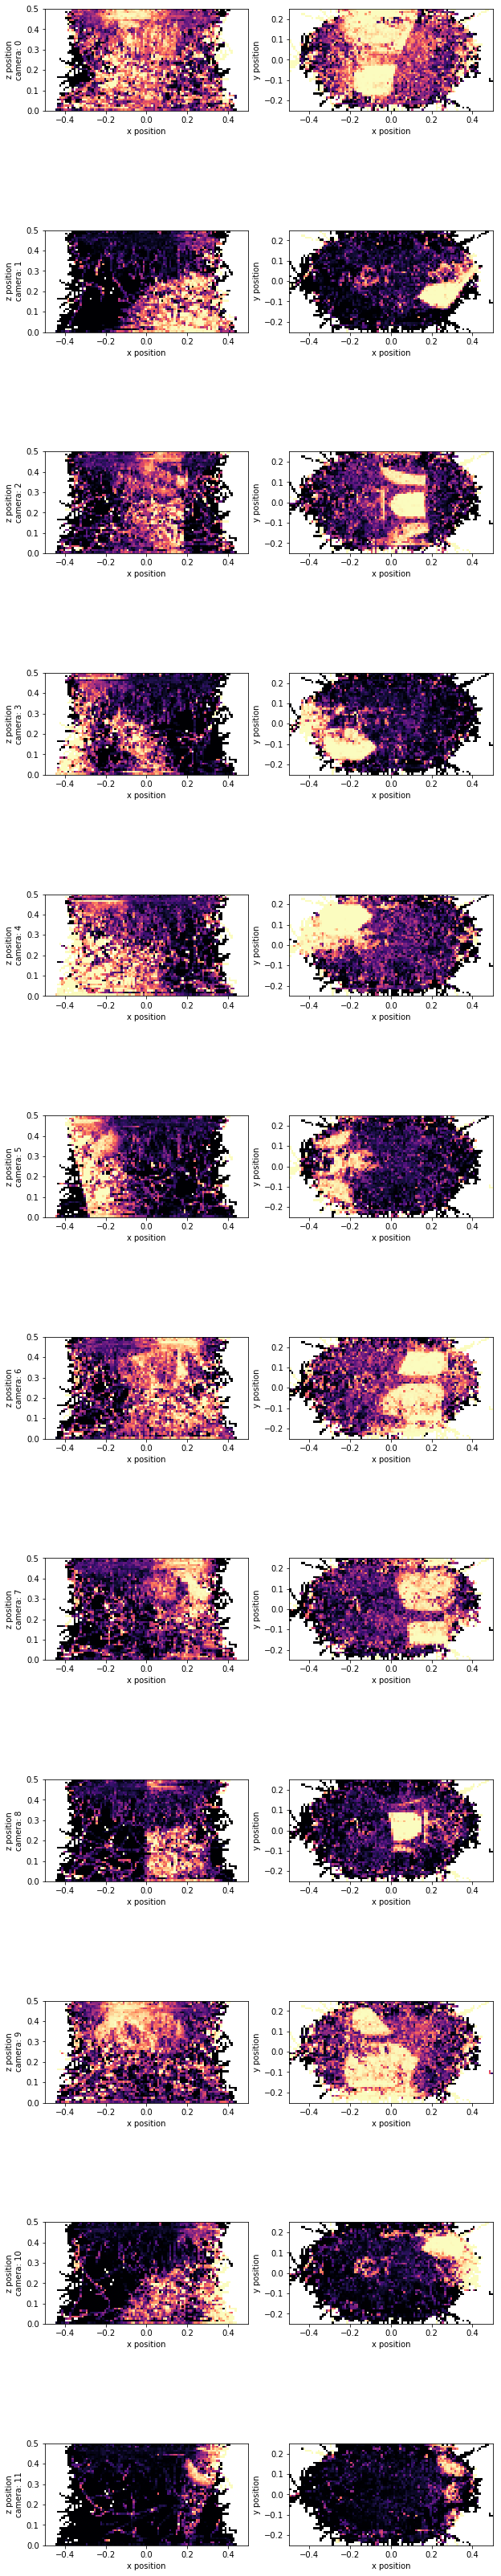

In [345]:
fig = plt.figure(figsize=(10, 60))

camns = df_2d_filtered.camn.unique()
camns = np.sort(camns)

i = 1
for camn in camns:
    print("Plotting camera: ", camn)
    ax1 = fig.add_subplot(len(camns), 2, i)
    ax2 = fig.add_subplot(len(camns), 2, i+1)
    i += 2
    
    plot_heatmap_of_camera_view(camn, df_3d_filtered, ax1=ax1, ax2=ax2)

# What do the cameras actually see, in 2D coordinates?

In [363]:
def plot_heatmap_of_camera_view_2d(camn, df_2d_filtered, ax1=None):
    res = 4
    binx = np.arange(0, 800+res, res)
    biny = np.arange(0, 600+res, res)
    
    q = df_2d_filtered.query("camn == " + str(camn) + " & x_real == 1")
    Hxy, xedges, yedges = np.histogram2d(q['x'], q['y'], bins=[binx, biny])

    # xy
    if ax1 is None:
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
    ax1.imshow( np.log(Hxy), origin="lower", 
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="magma")
    ax1.set_xlim(xedges[0], xedges[-1])
    ax1.set_ylim(yedges[0], yedges[-1])
    ax1.set_aspect('equal')

    ax1.set_xlabel('x pixel')
    ax1.set_ylabel('y pixel\ncamera: ' + str(camn))

Plotting camera:  0


/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


Plotting camera:  1
Plotting camera:  2
Plotting camera:  3
Plotting camera:  4
Plotting camera:  5
Plotting camera:  6
Plotting camera:  7
Plotting camera:  8
Plotting camera:  9
Plotting camera:  10
Plotting camera:  11


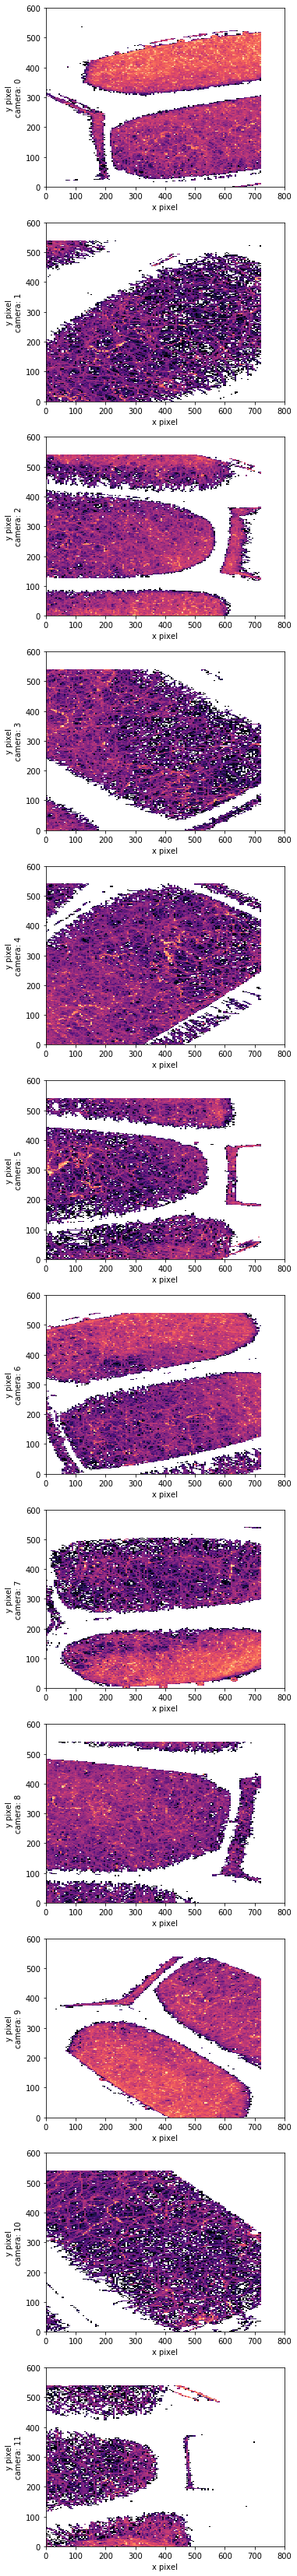

In [364]:
fig = plt.figure(figsize=(10, 60))

camns = df_2d_filtered.camn.unique()
camns = np.sort(camns)

i = 1
for camn in camns:
    print("Plotting camera: ", camn)
    ax1 = fig.add_subplot(len(camns), 1, i)
    i += 1
    
    plot_heatmap_of_camera_view_2d(camn, df_2d_filtered, ax1=ax1)